# EDA

## Table of contents
1. [Training Data](#train)
2. [Testing Data](#test)
3. [Spraying Data](#spray)
4. [Weather Data](#weather)


## External Research

https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_living/news/2021/august/city-to-spray-insecticide-wednesday-to-kill-mosquitoes.html
2021 mosquito spraying adulticide zenivax

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import re


In [2]:
# Reading in the data
test_clean = pd.read_csv('../data/test_clean.csv')
train_clean = pd.read_csv('../data/train_clean.csv')
weather_clean = pd.read_csv('../data/weather_Clean.csv')

## Training Data
---

In [3]:
#function to convert coordinates to radians before calculating distance between 2 coordinates
def get_distance(lat1, lon1, lat2, lon2):
    """
    This function takes the latitudes and longitudes of two points and returns the distance between them in km where
    - lat1: the latitude of the first point
    - lon1: the longitude of the first point
    - lat2: the latitude of the second point
    - lon2: the longitude of the second point
    - R: the radius of the Earth in km
    - C: the central angle between the two points in radians
    - temp: a temporary variable to account for 3 dimensionality
    """
    R = 6373.0
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    temp = (
         math.sin(dlat / 2) ** 2
       + math.cos(lat1)
       * math.cos(lat2)
       * math.sin(dlon / 2) ** 2
    )
    C = (2 * math.atan2(math.sqrt(temp), math.sqrt(1 - temp)))
    distance = R * C
    return distance

#function to calculate nearest station from trap according to distance
def nearest_station(trap_lat, trap_lon):
    """
    This function takes the latitude and longitude of a point (trap) and returns the station that the point is closer to 
    (station 1 or station 2)
    - trap_lat: the latitude of the trap
    - trap_lon: the longitude of the trap
    - station1_lat: the latitude of station 1 = 41.995
    - station1_lon: the longitude of station 1= -87.933
    - station2_lat: the latitude of station 2 = 41.786
    - station2_lon: the longitude of station 2 = -87.752
    - dist_station1: the distance to station 1
    - dist_station2: the distance to station 2
    """
    station1_lat = 41.995
    station1_lon = -87.933
    station2_lat = 41.786
    station2_lon = -87.752
    #calculates trap distance with station 1 / 2
    dist_station1 = get_distance(station1_lat,station1_lon,trap_lat,trap_lon)
    dist_station2 = get_distance(station2_lat,station2_lon,trap_lat,trap_lon)
    #comparing distances
    if dist_station1 > dist_station2:
        return 2
    else:
        return 1

In [4]:

train_clean['station'] = train_clean.apply(lambda x: nearest_station(x.latitude,x.longitude), axis = 1)
test_clean['station'] = test_clean.apply(lambda x: nearest_station(x.latitude,x.longitude), axis = 1)
train_clean['date'] = pd.to_datetime(train_clean['date'])
test_clean['date'] = pd.to_datetime(test_clean['date'])

weather_clean['date'] = pd.to_datetime(weather_clean['date'])



In [5]:
weather_clean

,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,week,weekday
0,1,2007-05-01,83,50,67.0,51,56.0,0.0,2.0,04:48:00,...,0.000,29.10,29.82,1.7,27,9.2,2007,5,18,2
1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,04:48:00,...,0.000,29.18,29.82,2.7,25,9.6,2007,5,18,2
2,1,2007-05-02,59,42,51.0,42,47.0,14.0,0.0,04:47:00,...,0.000,29.38,30.09,13.0,4,13.4,2007,5,18,3
3,2,2007-05-02,60,43,52.0,42,47.0,13.0,0.0,04:47:00,...,0.000,29.44,30.08,13.3,2,13.4,2007,5,18,3
4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,04:46:00,...,0.000,29.39,30.12,11.7,7,11.9,2007,5,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45.0,34,42.0,20.0,0.0,06:20:00,...,0.000,29.42,30.07,8.5,29,9.0,2014,10,44,3
2940,1,2014-10-30,51,32,42.0,34,40.0,23.0,0.0,06:22:00,...,0.000,29.34,30.09,5.1,24,5.5,2014,10,44,4
2941,2,2014-10-30,53,37,45.0,35,42.0,20.0,0.0,06:22:00,...,0.005,29.41,30.10,5.9,23,6.5,2014,10,44,4
2942,1,2014-10-31,47,33,40.0,25,33.0,25.0,0.0,06:23:00,...,0.030,29.49,30.20,22.6,34,22.9,2014,10,44,5


In [6]:
# Creating a merged dataset of weather and train dataframes
weather_train_df = pd.merge(train_clean, weather_clean, on =['station', 'year','date', 'month', 'week', 'weekday'])

In [7]:
weather_train_df.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,...,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,9.0,04:21:00,19:17:00,"['BR', 'HZ']",0.0,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,9.0,04:21:00,19:17:00,"['BR', 'HZ']",0.0,29.39,30.11,5.8,18,6.5
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,9.0,04:21:00,19:17:00,"['BR', 'HZ']",0.0,29.39,30.11,5.8,18,6.5
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,9.0,04:21:00,19:17:00,"['BR', 'HZ']",0.0,29.39,30.11,5.8,18,6.5
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,9.0,04:21:00,19:17:00,"['BR', 'HZ']",0.0,29.39,30.11,5.8,18,6.5


In [8]:
# sanity check to ensure merge is successful
weather_train_df.shape

(9693, 33)

From just looking at the head of our training data we can already tell that there are some instances of rows with exactly the same data values in all columns apart from `species`. This is due to the event of multiple species of mosquitoes being identified when the trap is collected. In the interest of obtaining more accurate insights in our EDA, we will use a dataframe (`single_samples`) without these instances for when the instances are not relevant i.e. if `species`, `nummosquito`, `wnvpresent` are not required.


In [9]:
# Getting all columns in our training data apart from 'species'
train_cols = [ col for col in train_clean.columns if col != 'species']

In [10]:
# Assigning the training data with no duplicates to single_samples
single_samples = train_clean.drop_duplicates(subset=train_cols)

In [11]:
 # Shape of single_samples
single_samples.shape

(8994, 17)

Text(0, 0.5, 'Number of Traps Collected')

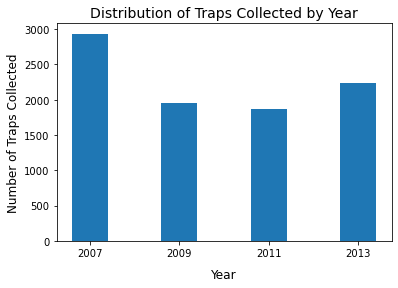

In [12]:
# Plotting bar chart of sampling occurrences by year
plt.tight_layout()
plt.title('Distribution of Traps Collected by Year', fontsize=14)
plt.bar(single_samples['year'].value_counts().sort_index().index,
        single_samples['year'].value_counts().sort_index())
plt.xlabel('Year', labelpad=10, fontsize=12)
plt.xticks(ticks=single_samples['year'].value_counts().sort_index().index, 
           labels=single_samples['year'].value_counts().sort_index().index,)
plt.ylabel('Number of Traps Collected', fontsize=12)

- From the above figure, we can see that the sampling was not consistent over the four years, with the most amount of sampling occurring in 2007 and the least amount of sampling in 2011

<a name=traps_month></a>

Text(45.0, 0.5, 'Number of Traps Collected')

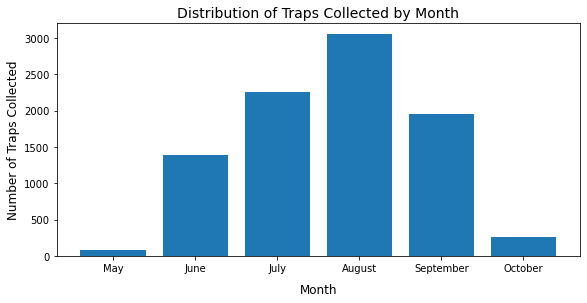

In [13]:
# Plotting bar chart of sampling occurrences by month
plt.figure(figsize=(8,4))
plt.title('Distribution of Traps Collected by Month', fontsize=14)
plt.tight_layout()
plt.bar(single_samples['month'].value_counts().sort_index().index,
        single_samples['month'].value_counts().sort_index())
plt.xlabel('Month', labelpad=10, fontsize=12)
plt.xticks(ticks=single_samples['month'].value_counts().sort_index().index, 
           labels=['May', 'June', 'July', 'August', 'September', 'October',])
plt.ylabel('Number of Traps Collected', fontsize=12)


- The sampling is extremely skewed; there was a lot more sampling done from June to September, presumably as this is the warmest months in Chicago and so there would be a greater number of mosquitoes

Text(81.0, 0.5, 'Number of Traps Collected')

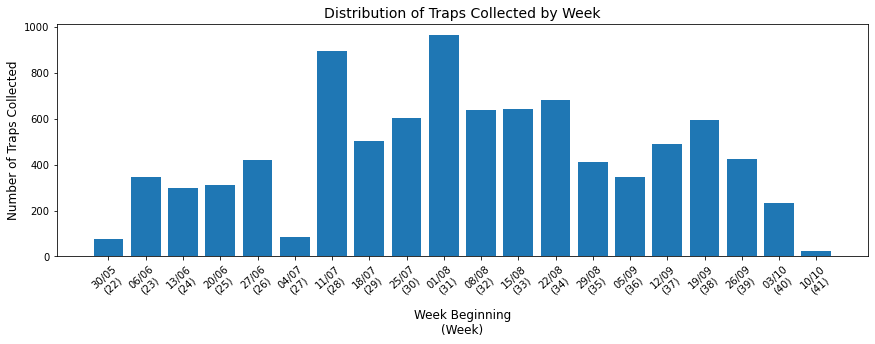

In [14]:
# Plotting bar chart of sampling occurrences by week
plt.figure(figsize=(12,4))
plt.title('Distribution of Traps Collected by Week', fontsize=14)
plt.tight_layout()
plt.bar(single_samples['week'].value_counts().sort_index().index,
        single_samples['week'].value_counts().sort_index())
plt.xlabel('Week Beginning\n(Week)', labelpad=10, fontsize=12)
plt.xticks(ticks=single_samples['week'].value_counts().sort_index().index, 
           labels=['30/05\n(22)', '06/06\n(23)', '13/06\n(24)', '20/06\n(25)', '27/06\n(26)', '04/07\n(27)', 
                   '11/07\n(28)', '18/07\n(29)', '25/07\n(30)', '01/08\n(31)', '08/08\n(32)', 
                   '15/08\n(33)', '22/08\n(34)', '29/08\n(35)', '05/09\n(36)', '12/09\n(37)', 
                   '19/09\n(38)', '26/09\n(39)', '03/10\n(40)', '10/10\n(41)'], rotation=42)
plt.ylabel('Number of Traps Collected', fontsize=12)

In [15]:
weather_train_df.groupby(['week', 'date']).sum()

block     latitude     longitude  addressaccuracy  \
week date                                                            
22   2007-05-29    906  1046.922110  -2192.404258              198   
     2009-05-28   2121  2425.908697  -5085.647096              459   
23   2007-06-05   2217  2512.953427  -5262.973680              492   
     2009-06-02   3289  3849.021683  -8067.769334              744   
     2009-06-03    130   545.637177  -1142.658755              109   
...                ...          ...           ...              ...   
39   2011-09-30   2220  2555.457130  -5352.582095              487   
     2013-09-26   3411  3848.634187  -8067.805347              724   
40   2007-10-04   7677  7743.056292 -16224.837114             1511   
     2009-10-01   2006  2719.700664  -5701.427094              511   
41   2007-10-09    654  1084.439687  -2276.880248              154   

                 nummosquitos  wnvpresent    year  month  weekday  station  \
week date                                                                    
22   2007-05-29            40           0   50175    125       50       43   
     2009-05-28           187           0  116522    290      232      100   
23   2007-06-05           127           0  120420    360      120       95   
     2009-06-02           613           0  184828    552      184      163   
     2009-06-03           298           0   26117     78       39       13   
...                       ...         ...     ...    ...      ...      ...   
39   2011-09-30           184           0  122671    549      305       89   
     2013-09-26           505           4  185196    828      368      159   
40   2007-10-04          1373           2  371295   1850      740      320   
     2009-10-01           212           0  130585    650      260      109   
41   2007-10-09           333           0   52182    260       52       51   

                 ...  dewpoint  wetbulb   heat   cool  preciptotal  \
week date        ...                                                 
22   2007-05-29  ...      1468   1643.0    0.0  279.0         0.00   
     2009-05-28  ...      2958   3132.0  322.0    0.0         0.00   
23   2007-06-05  ...      2845   3095.0  505.0    0.0        19.95   
     2009-06-02  ...      4303   4671.0  870.0    0.0         6.78   
     2009-06-03  ...       507    598.0  169.0    0.0         0.00   
...              ...       ...      ...    ...    ...          ...   
39   2011-09-30  ...      2529   2867.0  798.0    0.0         7.73   
     2013-09-26  ...      4784   5336.0   50.0    0.0         0.00   
40   2007-10-04  ...     10360  11420.0    0.0  775.0         0.00   
     2009-10-01  ...      2990   3185.0  887.0    0.0        44.65   
41   2007-10-09  ...      1144   1378.0   27.0    0.0         0.00   

                 stnpressure  sealevel  resultspeed  resultdir  avgspeed  
week date                                                                 
22   2007-05-29       735.65    752.39        145.0        414     178.7  
     2009-05-28      1687.58   1725.66        394.4       1698     478.2  
23   2007-06-05      1748.10   1787.05        347.0        230     473.5  
     2009-06-02      2705.38   2766.86        744.7        276     821.2  
     2009-06-03       382.46    391.95        136.5         52     139.1  
...                      ...       ...          ...        ...       ...  
39   2011-09-30      1789.92   1830.33        913.0       2074     951.4  
     2013-09-26      2703.30   2763.68        369.7        803     413.2  
40   2007-10-04      5434.65   5556.05        816.0       3145    1026.5  
     2009-10-01      1895.65   1943.50        578.3        845     582.3  
41   2007-10-09       760.96    778.19        314.0        728     345.3  

[95 rows x 23 columns]

- Similarly, the sampling done on a weekly basis was inconsistent, with the greatest disparity being the week starting the 4th of July which is likely due to the American holiday Independence Day
- That a week beginning on a public holiday resulted in fewer samples/traps being collected suggests that this is rather that, for whatever reason, the number of traps lain each week is due to human fault, as opposed to a consistent number of traps being set out each week that caught no mosquitoes when they were collected, and hence were not logged

Text(45.0, 0.5, 'Number of Sampling Occurrences')

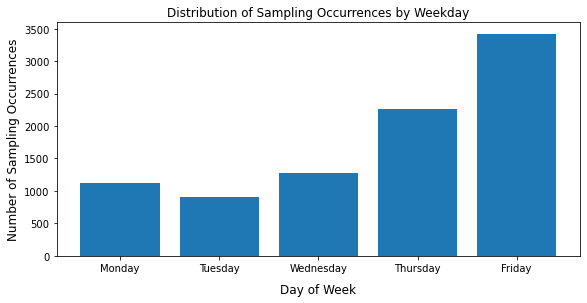

In [16]:
# Plotting bar chart of sampling occurrences by weekday
plt.figure(figsize=(8,4))
plt.title('Distribution of Sampling Occurrences by Weekday')
plt.tight_layout()
plt.bar(single_samples['weekday'].value_counts().sort_index().index,
        single_samples['weekday'].value_counts().sort_index())
plt.xlabel('Day of Week', labelpad=10, fontsize=12)
plt.xticks(ticks=single_samples['weekday'].value_counts().sort_index().index, 
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],)
plt.ylabel('Number of Sampling Occurrences', fontsize=12)

- Sampling done was also unequal over weekdays, with no sampling done on weekends and Friday being the most popular day for traps to be collected, and Tuesday the least popular

### `wnvpresent`

In [18]:
train_clean[train_clean['wnvpresent']==1].groupby(by='species').sum()

,block,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,week,weekday,station
species,,,,,,,,,,,
CULEX PIPIENS,7928,8706.099281,-18245.628233,1643,5129,208,417996,1718,7113,754,329
CULEX PIPIENS/RESTUANS,9661,10299.471321,-21583.501046,1995,6352,246,494598,2009,8299,925,374
CULEX RESTUANS,1620,2051.621354,-4299.174964,392,667,49,98559,378,1561,191,78


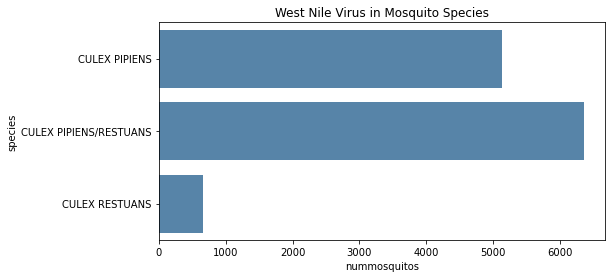

In [19]:
# Plotting the presence of West Nile Virus among different species of Mosquitoes
plt.figure(figsize=(8,4))
moz_wnv = train_clean[train_clean['wnvpresent']==1].groupby(by='species').sum().reset_index()
sns.barplot(data=moz_wnv, x='nummosquitos', y='species', color='#4986B6', orient='h')
plt.title('West Nile Virus in Mosquito Species');

- From the above chart, we can see that the West Nile Virus is only present in Culex Pipiens and Culex Restuans, Culex Pipiens/Restuans being the assigned name to mosquitoes that were unable to be defininitively identified as one or the other.

Text(0, 0.5, 'Percentage of Mosquitoes \nInfected with WNV (%)')

<Figure size 432x288 with 0 Axes>

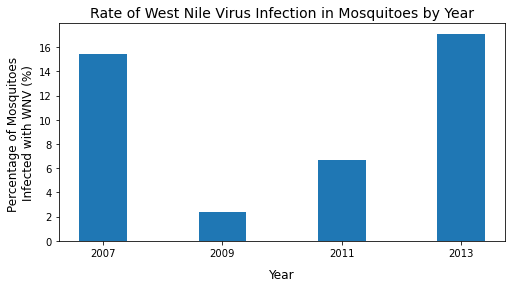

In [44]:
# Plotting the percentage of mosquitoes that were infected with WNV per year
plt.tight_layout()
plt.figure(figsize=(8,4))
plt.title('Rate of West Nile Virus Infection in Mosquitoes by Year', fontsize=14)

plt.bar(train_clean.groupby(by='year').sum().index,
        weather_train_df[weather_train_df['wnvpresent']==1].groupby('year')['nummosquitos'].sum() / 
        weather_train_df.groupby('year')['nummosquitos'].sum() * 100)

plt.xlabel('Year', labelpad=10, fontsize=12)
plt.xticks(ticks=train_clean.groupby(by='year').sum().index, 
           labels=train_clean.groupby(by='year').sum().index,)
plt.ylabel('Percentage of Mosquitoes \nInfected with WNV (%)', fontsize=12)

- From the above chart, we can note that the proportion of mosquitoes that carried the West Nile Virus was much higher in 2013 and 2007 than in 2009 and 2011
- This is due to a lower amount of sampling done in each 2009 and 2011. If more sampling were done, we would be able to have a clearer picutre of the trend of WNV virus infection over the years

Text(0, 0.5, 'Number of Mosquitoes Infected with WNV')

<Figure size 432x288 with 0 Axes>

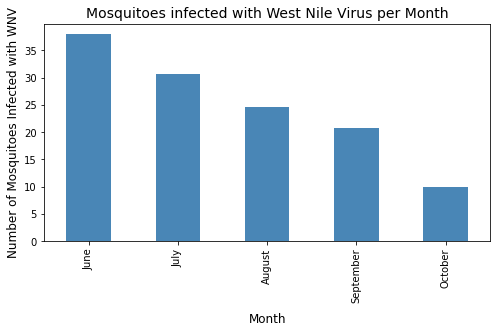

In [22]:
# plotting the number of WNV-infected mosquitoes per month
plt.tight_layout()
plt.figure(figsize=(8,4))
plt.title('Mosquitoes infected with West Nile Virus per trap per Month', fontsize=14)

weather_train_df[weather_train_df['wnvpresent']==1].groupby('month')['nummosquitos'].mean().plot.bar(color='#4986B6')

plt.xlabel('Month', labelpad=10, fontsize=12)
plt.xticks(ticks=train_clean[train_clean['wnvpresent']==1].groupby(by='month').sum().reset_index().index, 
           labels=['June', 'July', 'August', 'September', 'October'],)
plt.ylabel('Number of Mosquitoes Infected with WNV', fontsize=12)

- The majority of WNV mosquitoes were found in July, August, and September, which corresponds to the warmest months in Chicago
- This is also proportional to the distribution of traps that were lain, with the majority of traps being lain within these three months
- That being said, June is most notable for having a good number of traps being lain yet the traps not producing any WNV-infected mosquitoes

In [ ]:
train_clean[train_clean['wnvpresent']==1].groupby(by='month').sum()

In [ ]:
train_clean[train_clean['wnvpresent']==1].groupby(by='week').sum().reset_index()

In [ ]:
train_clean[train_clean['wnvpresent']==1].groupby(by='week').sum()

In [ ]:
# plotting the number of WNV-infected mosquitoes per week
plt.tight_layout()
plt.figure(figsize=(10,4))
plt.title('Mosquitoes infected with West Nile Virus per Week', fontsize=14)

weather_train_df[weather_train_df['wnvpresent']==1].groupby('week')['nummosquitos'].mean().plot.bar(color='#4986B6')

plt.xlabel('Week Beginning', labelpad=10, fontsize=12)
plt.xticks(ticks=train_clean[train_clean['wnvpresent']==1].groupby(by='week').sum().reset_index().index, 
           labels=['27/06\n(26)', '11/07\n(28)', '18/07\n(29)', '25/07\n(30)', '01/08\n(31)', '08/08\n(32)', 
                   '15/08\n(33)', '22/08\n(34)', '29/08\n(35)', '05/09\n(36)', '12/09\n(37)', '19/09\n(38)', '26/09\n(39)',
                   '03/10\n(40)',], rotation=42)
plt.ylabel('Number of Mosquitoes Infected with WNV', fontsize=12)

- Not too dissimilar from the previous chart; just confirming with more detail that in particular the middle to end of August were when the most number of WNV-infected mosquitoes were found

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DICKSON~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# not sure why your subplot charts and my subplot charts are so different, even accounting for the fact that yours is the average 
# per day
# it seems that your subplots may be not by 'average mosq per day by day/week/month/year'
# but instead 'average mosq per TESTING day by day/week/month/year'. In any case, it is a bit confusing. If anything, 
# should change to 'average mosq PER TEST per day by day/week/month/year'


#Update 2 - added the groupby 'date' to get average mosq per day by day, week,month,year instead of 
# just mean(which is taking mean of samples and hence inaccurate)

def subplot_histograms_wnv(dataframe, yvar, list_of_xvars, list_of_titles, list_of_xlabels, ylabel):
    """
    This function creates bar charts of the average number of mosquitoes caught a day against varying time scales given by 
    the argument list_of_xvars.
    dataframe: the dataframe from which data is to be used
    yvar: the variable that we are measuring. 'nummosquitos', in this case
    list_of_xvars: the list of of variables that we are plotting our yvar against
    list_of_titles: the list of titles for our bar charts
    list_of_xlabels: the list of xlabels for our bar charts
    ylabel: the ylabel for our bar charts
    
    """
    nrows = int(np.ceil(len(list_of_xvars)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,10)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_xvars): # Gives us an index value to get into all our lists
        df = dataframe.groupby([column,'date']).sum()
        df.reset_index().groupby(column).mean()[yvar].plot(kind='bar', ax=ax[i])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(ylabel)
        ax[i].tick_params(rotation = 0)
    plt.tight_layout()

In [ ]:
# Comparing the effects of sesonality on no. of mosquitos caught
subplot_histograms_wnv(dataframe= weather_train_df[weather_train_df['wnvpresent']==1],
                   yvar ='nummosquitos',
                  list_of_xvars=['weekday', 'week', 'month', 'year'],
                  list_of_titles=['Average no. of wnv mosquitos caught each day by weekday', 'Average no. of wnv mosquitos caught each day by week', 'Average no. of wnv mosquitos caught each day by month', 'Average no. of wnv mosquitos caught each day by year'],
                  list_of_xlabels=['Day', 'Week', 'Month', 'Year'],
                  ylabel='No. of mosquitos') 

# august has about same number of counts of mosquitos caught, but the infection rate is much higher
# 2007 has a high count of wnv virus mosq though count is only slightly higher than 2009, 2011



Overall Frequency of WNV.

In [ ]:
# charting the prevalence of WNV-infected mosquitoes
sns.barplot(x=[0,1], y=weather_train_df['wnvpresent'].value_counts(normalize=True))
plt.xlabel('Presence of West Nile Virus', fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.tick_params(labelsize=14)
plt.title('Frequency of WnvPresent',fontsize=16, y=1.03)
plt.show()
print(f"{round(weather_train_df['wnvpresent'].value_counts(normalize=True)[1] * 100 ,1)}% of the mosquitoes sampled were found to have WNV.")

- From the above chart, we can see that most of the mosquitoes sampled were found not to be absent of the West Nile Virus, with only 5.2% of them actually carrying it
- If we were to use this raw data, the accuracy of our model would suffer due to the imbalance in result class labels. We will have to look into some way of correcting this imbalance, likely through oversamplying of the important class.

In [ ]:
weather_train_df.groupby(['year','month'])['wnvpresent'].sum().unstack().plot.bar(figsize=(10,4))
plt.xticks(rotation=0);

- In all the years in our dataset, August and September are the months in wich the most number of WNV-infected mosquitoes were detected, with July coming in a distant 3rd
- THe above observation is of particular importance as when considering [this](#traps_month) graph, there were actually more traps lain in July than September which clearly indicates that the high rates of WNV present in September is despite lower sampling done, meaning that there are external reasons for it

In [ ]:
weather_train_df[weather_train_df['wnvpresent']==1]

In [ ]:
# plotting a regression plot along dewpoint and wetbulb features to see their relationship with the presence of WNV
sns.lmplot(data=weather_train_df, x='wetbulb', y='dewpoint', hue='wnvpresent', fit_reg=False);

In summary, we see a confirmation of the trend we first saw when we looked at the occurence of WNV with respect to both Dewpoint temperature and Wetbulb temperature. As humidity and heat increases, we see a higher occurence of the virus. This is as expected as mosquitos require higher temperature and humidity in order to breed.<br>

Range of WNV detection:
* Dewpoint Temperature: 54 - 73 degrees Farenheit
* Wetbulb Temperature: 62 - 76 degrees Farenheit

In [ ]:
weather_train_df['trap'].value_counts().sort_values()

In [ ]:
weather_train_df[weather_train_df['wnvpresent']==1].groupby('trap')['nummosquitos'].sum().sort_values()

In [ ]:
weather_train_df[weather_train_df['wnvpresent']==1].groupby(['tavg', 'trap']).mean()

In [ ]:
# plotting the average number of WNV-infected mosquitoes per trap against temperature
plt.figure(figsize=(10,10))
weather_train_df[weather_train_df['wnvpresent']==1].groupby('tavg')['nummosquitos'].mean().plot.bar(color='#4986B6')
plt.xticks(rotation=42)
plt.title('WNV detection vs Average Temp')
plt.ylabel('WNV detection')
plt.xlabel('Average Temperature');

- From the above chart, we can confirm the findings from our [external research] that the number of mosquitoes (and hence the presence of WNV) has a positive correlation with temperature
- The number of mosquitoes peak at a point of 72 degrees Farenheit, and we can see a negative correlating trend from 80-82 degrees Farenheit onwards

In [ ]:
weather_train_df[weather_train_df['wnvpresent']==1].groupby('tavg').mean()

## Testing Data
---

## Spraying Data
---

## Weather Data<a name=weather></a>
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import math

%config InlineBackend.figure_format = 'retina'
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)

pd.set_option('display.max_columns', 500, 'display.max_rows', 500, 'display.width', 1000)

In [ ]:
weather = pd.read_csv('../data/weather.csv')

In [ ]:
weather.info()

In [ ]:
weather.head()

In [ ]:
#changing columns to lowercase
weather.columns = weather.columns.str.lower()

In [ ]:
#checking on preciptotal since it is an object

display(weather['preciptotal'].value_counts())

#replacing preciptotal
weather['preciptotal'].replace('  T', 0.005, inplace=True)

#https://www.chicagotribune.com/news/ct-xpm-2011-04-16-ct-wea-0417-asktom-20110416-story.html

In [ ]:
# we see that there are both - and M values. Let us standardize them
weather = weather.replace({'-':np.nan,'M': np.nan})

In [ ]:
#changing date to dt object
weather['date'] = pd.to_datetime(weather.date)

#creating new date columns to see seasonal/time trends
weather['year'] = weather.date.dt.year
weather['month'] = weather.date.dt.month
weather['weekday'] = weather['date'].apply(dt.date.isoweekday)

In [ ]:
# check na

display(weather.isna().sum())

In [ ]:
# inspecting tavg na values
display(weather[weather['tavg'].isna()])

#prove that tavg is ceil average of tmax and tmin
all(np.ceil((weather[weather['tavg'].notna()]['tmax']+weather[weather['tavg'].notna()]['tmin'])/2)
    == weather[weather['tavg'].notna()]['tavg'].astype(float))

# since tavg is the ceil average of tmin and tmax, we will impute the na values as so

In [ ]:
# imputing tavg with avg with tmin,tmax

weather.loc[weather['tavg'].isna(),'tavg'] = np.ceil((weather[weather['tavg'].isna()]['tmax']+weather[weather['tavg'].isna()]['tmin'])/2).astype(int)

In [ ]:
# Check on weather water 1 values

display(weather.water1.value_counts())

weather = weather.drop('water1',axis=1)

# dropping the whole of Water1 as it has only 1 single variable - M for Missing

In [ ]:
# Checking on weather depth values

display(weather.depth.value_counts())
display(weather.station.value_counts())

# We check to see if the values are of similar rows i.e. they correspond to one another

print(all(weather[weather['depth']=='0'].index == weather[weather['station']==1].index))

weather = weather.drop('depth',axis=1)

# Since the indexes are the same, we drop them to prevent high correlation between the columns

In [ ]:
# check to see if na values are alternate
print(weather[weather['depart'].isna()]['station'].value_counts())
print(weather[weather['sunset'].isna()]['station'].value_counts())
print(weather[weather['sunrise'].isna()]['station'].value_counts())

# we notice that the depart columns has na values half of our df length. 
# Hence, we decided to check if it is alternate. 
# we found out that indeed, they are alternate and are values mostly missing from station 2
# for departing from normal temperature, we already have temperature average, so we can drop this
# for sunset and sunrise, we can assume that they are similar for both stations, and hence we will do a ffill

In [ ]:
# Checking on snowfall values

display(weather['snowfall'].value_counts())

weather = weather.drop('snowfall',axis=1)

# As there is no snow for the collection months of May-Oct, they are mostly M and 0 values. 
# We can hence drop this column


In [ ]:
# dropping depart form normal temp column
weather = weather.drop('depart',axis=1)

# ffill for sunset and sunrise

weather[['sunset','sunrise']]= weather[['sunset','sunrise']].fillna(method = 'ffill')

In [ ]:
#reformat time
formatted_time = []
for time in weather['sunrise']:
    new_time = re.sub(r'(\d\d)(\d\d)',r'\1:\2',time)
    formatted_time.append(new_time)
    
weather['sunrise'] = formatted_time

In [ ]:
#change to dt object
weather['sunrise']= pd.to_datetime(weather['sunrise']).dt.time
weather['sunrise']

In [ ]:
# discovered erroneous sunset timings of 1860. Making an intelligent guess that it is 1900
weather['sunset'].replace('1860','1900',inplace=True)
weather['sunset'].replace('1760','1800',inplace=True)
weather['sunset'].replace('1660','1700',inplace=True)

#reformatting time
formatted_time = []
for time in weather['sunset']:
    new_time = re.sub(r'(\d\d)(\d\d)',r'\1:\2',time)
    formatted_time.append(new_time)
    
weather['sunset'] = formatted_time

#changed to dt object
weather['sunset']= pd.to_datetime(weather['sunset']).dt.time
weather['sunset']

In [ ]:
# From the noaa_weather_qclcd_documentation, codesum ' ' is equals to moderate

weather['codesum'] = weather['codesum'].replace(' ', 'Moderate')

In [ ]:
# split codesum from space separated into a list

weather['codesum'] = weather['codesum'].str.split(' ')

In [ ]:
# Checking the rest of the na values
display(weather['stnpressure'].isna().sum())
display(weather[weather['stnpressure'].isna()])

In [ ]:
weather['sealevel'].isna().sum()
display(weather[weather['sealevel'].isna()])

In [ ]:
display(weather['wetbulb'].isna().sum())
display(weather[weather['wetbulb'].isna()])

# we see that these 3 columns of stnpressure,have very little na values. 
# We will fill them with the median of the month

In [ ]:
# Impute the median of wetbulb according to the median of their months

display(weather.loc[weather['wetbulb'].isna(),'date'].dt.month)

wb_june_median = weather[weather['month'] == 6]['wetbulb'].median()
wb_aug_median = weather[weather['month'] == 8]['wetbulb'].median()

weather.loc[848, 'wetbulb'] = wb_june_median
weather.loc[2410, 'wetbulb'] = wb_aug_median 
weather.loc[2412, 'wetbulb'] = wb_aug_median 
weather.loc[2415, 'wetbulb'] = wb_aug_median 

In [ ]:
# Impute the median of stnpressure according to the median of their months

print(weather.loc[weather['stnpressure'].isna(),'date'].dt.month)

sp_jun_median = round(weather[weather['month'] == 6]['stnpressure'].median(),2)
sp_aug_median = round(weather[weather['month'] == 8]['stnpressure'].median(),2)

weather.loc[87, 'stnpressure'] = sp_jun_median
weather.loc[848, 'stnpressure'] = sp_jun_median
weather.loc[2410, 'stnpressure'] = sp_aug_median
weather.loc[2411, 'stnpressure'] = sp_aug_median

In [ ]:
# Impute the median of sealevel according to the median of their months

print(weather.loc[weather['sealevel'].isna(),'date'].dt.month)

sl_jun_median = round(weather[weather['month'] == 6]['sealevel'].median(),2)
sl_jul_median = round(weather[weather['month'] == 7]['sealevel'].median(),2)
sl_aug_median = round(weather[weather['month'] == 8]['sealevel'].median(),2)
sl_sep_median = round(weather[weather['month'] == 9]['sealevel'].median(),2)

weather.loc[87, 'sealevel'] = sl_jun_median
weather.loc[832, 'sealevel'] = sl_jun_median
weather.loc[2743, 'sealevel'] = sl_jul_median
weather.loc[2067, 'sealevel'] = sl_aug_median 
weather.loc[994, 'sealevel'] = sl_sep_median 
weather.loc[1732, 'sealevel'] = sl_sep_median 
weather.loc[1745, 'sealevel'] = sl_sep_median 
weather.loc[1756, 'sealevel'] = sl_sep_median 
weather.loc[2090, 'sealevel'] = sl_sep_median 

In [ ]:
# dealing with null values from precip total
precip_na_index = weather[weather['preciptotal'].isna()].index

date1, date2 = weather.loc[precip_na_index]['date'].values

display(weather[weather['date'] == date1])

display(weather[weather['date'] == date1])

# imputing np.nan as 0 value

weather['preciptotal'] = weather['preciptotal'].fillna(0)

# we see that for the nan values in precip total belonging to station 2, the corresponding date on station 1 is 0
# hence, an intelligent guess would be that there is no rain that day and we imputed as so

In [ ]:
# Convert all the strings to appropriate int type

weather['tavg'] = weather['tavg'].astype(float)
weather['wetbulb'] = weather['wetbulb'].astype(float)
weather['heat'] = weather['heat'].astype(float)
weather['cool'] = weather['cool'].astype(float)
weather['preciptotal'] = weather['preciptotal'].astype(float)
weather['stnpressure'] = weather['stnpressure'].astype(float)
weather['sealevel'] = weather['sealevel'].astype(float)
weather['avgspeed'] = weather['avgspeed'].astype(float)

In [ ]:
# the average speed is the wind speed. let us impute these na values

display(weather[weather['avgspeed'].isna()])
display(f'averagespeed b/t stations: {weather["avgspeed"].diff().mean()}')

# using station 1 to predict station 2
weather['avgspeed'] = weather['avgspeed'].fillna(method='ffill')

# as we can see,, the average mean diff between station 1 and 2  is minimal. 
# Hence, we can use the station 1 value to predict station 2 value

In [ ]:
# any temp average value above 65 will be recorded as cool, and vice versa heat
# impute na values for heat and cool

def impute_heat_cool(row):
    
    if math.isnan(row['heat']):

        temp = 65 - row['tavg']
        
        if temp<0:
            row['heat'] = 0
            row['cool'] = temp
            
        if temp>0:
            row['cool']=0
            row['heat'] = temp
        else:
            row['heat'] = row['cool']= 0
        
    if math.isnan(row['cool']):
        
        temp = 65 - row['tavg']
        
        if temp<0:
            row['heat'] = 0
            row['cool'] = temp
            
        if temp>0:
            row['cool']=0
            row['heat'] = temp
            
    return row 
        

In [ ]:
weather = weather.apply(impute_heat_cool,axis=1)

In [ ]:
weather.isna().sum()

In [ ]:
#now that we have cleaned the data, we can save to csv file

weather.to_csv('../data/weather_clean.csv',index=False)

In [ ]:
pd.read_csv('../data/weather_clean.csv')

In [ ]:
train_clean = pd.read_csv('../data/train_clean.csv')
test_clean = pd.read_csv('../data/test_clean.csv')
spray_clean = pd.read_csv('../data/spray_clean.csv')
weather_clean = pd.read_csv('../data/weather_clean.csv')

In [ ]:
test_clean.shape

In [ ]:
weather_clean['date'] = pd.to_datetime(weather_clean['date'])

In [ ]:
train_clean['dayofweek'].value_counts()
weather_clean['week'] = weather_clean['date'].apply(lambda x: x.week)

In [ ]:
weather_clean['dayofweek'] = weather_clean['date'].apply(lambda x: x.dayofweek)

In [ ]:
weather_clean['week'].head()

In [ ]:
weather.columns

In [ ]:
merged_df = train_clean.merge(weather_clean, how='left',on=['year', 'week', 'month', 'dayofweek'])

In [ ]:
train_clean

In [ ]:
merged_df['station']

In [ ]:
#function to convert coordinates to radians before calculating distance between 2 coordinates

def get_distance(lat1, lon1, lat2, lon2): 
    
    R = 6373.0
    
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    dlon = lon2 - lon1 
    dlat = lat2 - lat1

    temp = (  
         math.sin(dlat / 2) ** 2 
       + math.cos(lat1) 
       * math.cos(lat2) 
       * math.sin(dlon / 2) ** 2
    )
    
    C = (2 * math.atan2(math.sqrt(temp), math.sqrt(1 - temp)))

    distance = R * C
    
    return distance


#function to calculate nearest station from trap according to distance

def nearest_station(trap_lat, trap_lon):
    
    station1_lat = 41.995 
    station1_lon = -87.933 
    station2_lat = 41.786 
    station2_lon = -87.752
    
    #calculates trap distance with station 1 / 2
    dist_station1 = get_distance(station1_lat,station1_lon,trap_lat,trap_lon)
    dist_station2 = get_distance(station2_lat,station2_lon,trap_lat,trap_lon)
    
    #comparing distances
    if dist_station1 > dist_station2:
        return 2
    else:
        return 1
    
train_clean['station'] = train_clean.apply(lambda x: nearest_station(x.latitude,x.longitude), axis = 1)
test_clean['station'] = test_clean.apply(lambda x: nearest_station(x.latitude,x.longitude), axis = 1)

train_clean['date'] = pd.to_datetime(train_clean['date'])
test_clean['date'] = pd.to_datetime(test_clean['date'])
weather_clean['date'] = pd.to_datetime(weather_clean['date'])

weather_train_df = pd.merge(train_clean, weather_clean, on =['date','station','year','month','week','dayofweek'])

In [ ]:
mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-88, -87.5, 41.6, 42.1)
plt.figure(figsize=(16,16))
plt.imshow(mapdata,
           cmap=plt.get_cmap('GnBu_r'),
           extent=lon_lat_box,
           aspect=aspect)

# extracting 2011 trap data
traps = weather_train_df[['date', 'trap','longitude', 'latitude', 'wnvpresent']]
traps_11 = traps[traps["date"].dt.year == 2011]
trap_values = traps_11[['longitude', 'latitude']].drop_duplicates().values

# extracting 2011 spray data
sprays = spray[spray['longitude']>-88]
spray_11 = sprays[sprays["year"]== 2011]
spray_11_values = spray_11[['longitude', 'latitude']].drop_duplicates().values

# extracting 2011 wnv data
wnvpresent_11 = traps[(traps['wnvpresent'] == 1) & (traps["date"].dt.year == 2011)]
wnvpresent_values = wnvpresent_11[['longitude', 'latitude']].drop_duplicates().values

#plot
plt.scatter(spray_11_values[:,0], spray_11_values[:,1], c='orange', alpha=1, label="Spray")
plt.scatter(trap_values[:,0], trap_values[:,1], s = 500, c='blue',marker='x',label='Trap', alpha = 0.5)
plt.scatter(wnvpresent_values[:,0], wnvpresent_values[:,1], s = 60, c='r', marker='o', label='wnv present mozzies')

plt.title('Map of Sprays, Traps and WNV Positive Cases (2011)')
plt.legend();

In [ ]:
mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-88, -87.5, 41.6, 42.1)
plt.figure(figsize=(20,16))
plt.imshow(mapdata,
           cmap=plt.get_cmap('GnBu_r'),
           extent=lon_lat_box,
           aspect=aspect)

# get 2013 trap data
traps = weather_train_df[['date', 'trap','longitude', 'latitude', 'wnvpresent']]
traps_13 = traps[traps["date"].dt.year == 2013]
trap_values = traps_13[['longitude', 'latitude']].drop_duplicates().values

#get 2013 spray data
sprays = spray[spray['longitude']>-88]
spray_13 = sprays[sprays["year"]== 2013]
spray_13_values = spray_13[['longitude', 'latitude']].drop_duplicates().values

#get 2013 wnv data
wnvpresent_13 = traps[(traps['wnvpresent'] == 1) & (traps["date"].dt.year == 2013)]
wnvpresent_values = wnvpresent_13[['longitude', 'latitude']].drop_duplicates().values

#plot
plt.scatter(spray_13_values[:,0], spray_13_values[:,1], c='orange', alpha=1, label="Spray")
plt.scatter(trap_values[:,0], trap_values[:,1], s = 500, c='blue',marker='x',label='Trap', alpha = 0.5)
plt.scatter(wnvpresent_values[:,0], wnvpresent_values[:,1], s = 60, c='r', marker='o', label='wnv present mozzies')

plt.title('Map of Sprays, Traps and WNV Positive Cases (2013)')
plt.legend();

#alot more spray done in 2013 than 2011. 
#is this effective? have to look at effectiveness of sprays broken down by month

In [ ]:
#load map data
mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

fig,ax = plt.subplots(ncols = int(weather_train_df['month'].unique().shape[0]/2), nrows = 2, figsize=(20,15))

ax = ax.ravel()

for i, month in enumerate(weather_train_df['month'].unique()):
    
    ax[i].imshow(mapdata, cmap=plt.get_cmap('GnBu_r'), extent=lon_lat_box, aspect=aspect)

    #traps data
    traps = weather_train_df[['date', 'trap','longitude', 'latitude', 'wnvpresent']]
    locations = traps[['longitude', 'latitude']].drop_duplicates().values

    #2011 spray data
    spray = spray[spray['longitude']>-88]
    spray_11_month = spray[(spray["year"]== 2011) & (spray["month"] == month)]
    sprays = spray_11_month[['longitude', 'latitude']].drop_duplicates().values

    #2011 wnvpresent data
    wnvpresent_11_month = traps[(traps['wnvpresent'] == 1) & (traps["date"].dt.year == 2011) & (traps["date"].dt.month == month)]
    wnvpresents = wnvpresent_11_month[['longitude', 'latitude']].drop_duplicates().values

    ax[i].scatter(sprays[:,0], sprays[:,1], c='orange', alpha=1, label="Spray")
    ax[i].scatter(locations[:,0], locations[:,1], s = 100, c='blue',marker='x',label='Trap',alpha=0.5)
    ax[i].scatter(wnvpresents[:,0], wnvpresents[:,1], s = 30, c='r', marker='o', label='wnv present mozzies')

    ax[i].set_title(f'Month: {month}')
    
plt.suptitle('Spray, Trap and WNV Positive Cases in 2011 across Months')
plt.legend(loc='upper right', bbox_to_anchor=(1, 2.5));

In [ ]:
#load map data
mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

fig,ax = plt.subplots(ncols = int(weather_train_df['month'].unique().shape[0]/2), nrows = 2, figsize=(20,15))

ax = ax.ravel()

for i, month in enumerate(weather_train_df['month'].unique()):
    
    ax[i].imshow(mapdata, cmap=plt.get_cmap('GnBu_r'), extent=lon_lat_box, aspect=aspect)

    #traps data
    locations = traps[['longitude', 'latitude']].drop_duplicates().values

    #2013 spray data
    spray = spray[spray['longitude']>-88]
    spray_13_month = spray[(spray["year"]== 2013) & (spray["month"] == month)]
    sprays = spray_13_month[['longitude', 'latitude']].drop_duplicates().values

    #2013 wnvpresent data
    wnvpresent_13_month = traps[(traps['wnvpresent'] == 1) & (traps["date"].dt.year == 2013) & (traps["date"].dt.month == month)]
    wnvpresents = wnvpresent_13_month[['longitude', 'latitude']].drop_duplicates().values

    ax[i].scatter(sprays[:,0], sprays[:,1], c='orange', alpha=1, label="Spray")
    ax[i].scatter(locations[:,0], locations[:,1], s = 100, c='blue',marker='x',label='Trap',alpha=0.5)
    ax[i].scatter(wnvpresents[:,0], wnvpresents[:,1], s = 30, c='r', marker='o', label='wnv present mozzies')

    ax[i].set_title(f'Month: {month}')
    
plt.suptitle('Spray, Trap and WNV Positive Cases in 2013 across Months')
plt.legend(loc='upper right', bbox_to_anchor=(1, 2.5));

# spraying ineffective as even after august spray still has lots of spots
# number of mosquitos with wnv have dropped consistently in month 10. possibly due to temperature

In [ ]:
def subplot_histograms_caught(dataframe, yvar, list_of_xvars, list_of_titles, list_of_xlabels, ylabel):
    nrows = int(np.ceil(len(list_of_xvars)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,10)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_xvars): # Gives us an index value to get into all our lists
        dataframe.groupby(column)[yvar].sum().plot(kind='bar', ax=ax[i])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(ylabel)
    plt.tight_layout()

In [ ]:
# Comparing the effects of sesonality on no. of mosquitos caught
subplot_histograms_caught(dataframe= weather_train_df,
                   yvar ='nummosquitos',
                  list_of_xvars=['weekday_y', 'week', 'month', 'year'],
                  list_of_titles=['Average no. of mosquitos caught each day', 'Average. of mosquitos caught each week', 'Average. of mosquitos caught each month', 'Average. of mosquitos caught each year'],
                  list_of_xlabels=['Day', 'Week', 'Month', 'Year'], 
                  ylabel='No. of mosquitos')

# as expected, day does not have much variance
# jul and august have higher count of mosquitos
# 2013 have much higher count of mosquitos. Were more traps set then or were there mainly more mosquitos?

In [ ]:
def subplot_histograms_wnv(dataframe, yvar, list_of_xvars, list_of_titles, list_of_xlabels, ylabel):
    nrows = int(np.ceil(len(list_of_xvars)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,10)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_xvars): # Gives us an index value to get into all our lists
        dataframe.groupby(column)[yvar].count().plot(kind='bar', ax=ax[i])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(ylabel)
    plt.tight_layout()

In [ ]:
# Comparing the effects of sesonality on no. of mosquitos caught
subplot_histograms_wnv(dataframe= weather_train_df[weather_train_df['wnvpresent']==1],
                   yvar ='nummosquitos',
                  list_of_xvars=['weekday_y', 'week', 'month', 'year'],
                  list_of_titles=['Average no. of wnv mosquitos caught each day', 'Average. of wnv mosquitos caught each week', 'Average. of wnv mosquitos caught each month', 'Average. of wnv mosquitos caught each year'],
                  list_of_xlabels=['Day', 'Week', 'Month', 'Year'],
                  ylabel='No. of mosquitos') 

# august has about same number of counts of mosquitos caught, but the infection rate is much higher
# 2007 has a high count of wnv virus mosq though count is only slightly higher than 2009, 2011

In [ ]:
weather_train_df.groupby(['year','species']).wnvpresent.mean().unstack().plot.bar(figsize=(8,6))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Probability of mosquito species carrying virus', fontsize=16, y=1.01)
plt.ylabel('Probability', fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.legend(fontsize=9)
plt.show()

# culex pipens and restauns highest probability

In [ ]:
weather_train_df['resultspeed'].value_counts().sort_index()


In [ ]:
weather_train_df[['trap', 'week', 'nummosquitos', 'wnvpresent', 'tavg', 'wetbulb', 'dewpoint', 'codesum', ]]
